In [1]:
from sympy.vector import curl, divergence, gradient, CoordSys3D, Del

In [2]:
transformation = 'spherical'
var_names = ['r', r'\theta', r'\phi']
vec_names = ['e_' + v for v in var_names] 
R = CoordSys3D('', transformation=transformation, variable_names=var_names, vector_names=vec_names)

In [3]:
%run -i define_symbols_beta.py

1.1.2.dev


# Coriolis term for horizontal velocity ($u_r \to 0 $)

Vertical component of Earth's rotation vector

In [4]:
# f = 2 * omega1 * sin(R.y)  # When $\theta$ represents the latitude (geographics convention)
f = 2 * omega1 * cos(R.y)  # When $\theta$ represents the co-latitude (physics convention)
f

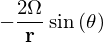

In [5]:
beta = gradient(f).dot(R.j)
beta

In [6]:
vort = curl(u)
vort_r = vort.dot(R.i)
div = divergence(u_h)

In [7]:
corio = (-f * R.i).cross(u)

In [8]:
corio

## Coriolis term in vorticity equation

$\nabla \times (-f \hat{e}_r \times \bf{u})$ is given by

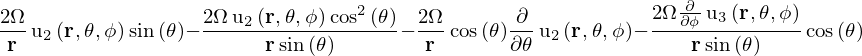

In [9]:
curl(corio).dot(R.i).expand()

Divergence in spherical coordinates is given by:

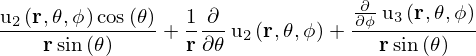

In [10]:
div.expand()

$u_1 = 0$ in the above equation because it is the 2D divergence --- which can be separated from the expression for $\nabla \times (-f \hat{e}_r \times \bf{u})$

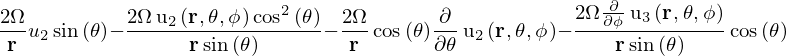

In [11]:
(- beta * u2 - f * div).expand()

Therefore linearized vorticity equation can be written as:
$$\partial_t \zeta = -\beta u_\theta - f\nabla . \mathbf{u}$$

## Coriolis term in divergence equation

$\nabla . (-f \hat{e}_r \times \bf{u})$ is given by

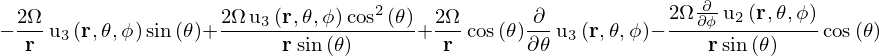

In [12]:
divergence(corio).expand()

Vertical component of vorticity (in the $\hat{e}_r$ direction), $\zeta$ in spherical coordinates is given by:

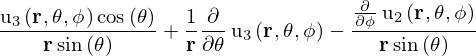

In [13]:
vort_r.expand()

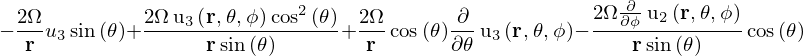

In [14]:
(beta * u3 + f * vort_r).expand()

Therefore linearized divergence equation can be written as:
$$\partial_t \nabla.\mathbf{u} = \beta u_\phi + f\zeta - c^2 \nabla^2 \eta $$

## Linearized equations in vorticity-divergence formulation $(\zeta, \delta, \eta)$

$$
\begin{align}
\partial_t \zeta &= -\beta u_\theta - f\delta \\
\partial_t \delta &= \beta u_\phi + f\zeta - c^2 \nabla^2 \eta \\
\partial_t \eta &= -\delta
\end{align}
$$

Projecting the spherical velocities onto the beta plane, $u_\theta \to v$ (y component) and $u_\phi \to u$ (x component)

$$
\begin{align}
\partial_t \zeta &= -\beta v - f\delta \\
\partial_t \delta &= \beta u + f\zeta - c^2 \nabla^2 \eta \\
\partial_t \eta &= -\delta
\end{align}
$$

## Linearized equations in stream function-potential formulation $(\Psi, \Phi, \eta)$

Let stream function and velocity potential be defined as:

$$ \mathbf u = - \nabla \times (\Psi \hat{e}_z) + \nabla \Phi $$

which implies the velocities are given by:

$$u = -\Psi_y + \Phi_x$$
$$v = \Psi_x + \Phi_y$$

and also implies vorticity and divergence to be represented as:
$$\zeta = \nabla^2 \Psi$$
$$\delta = \nabla^2 \Phi$$

$$
\begin{align}
\partial_t \nabla^2 \Psi &= -\beta(\Psi_x + \Phi_y)  - f \nabla^2 \Phi \\
\partial_t \nabla^2 \Phi &= \beta(-\Psi_y + \Phi_x) + f\nabla^2 \Psi  - c^2 \nabla^2 \eta \\
\partial_t \eta &= -\nabla^2 \Phi
\end{align}
$$

**The eigenvalue problem and normal modes are solved in `normalmode_nb-beta.ipynb`**